In [ ]:
Analysis:
Observed trend 1 - Temperature is higher at lower Latitudes and lower at higher latitudes.
Observed trend 2 - Humidity is above 60% at the ploes and less close to the equator.
Observed trend 3 - Latitude does not seem to effect Wind Speed or Cloudiness.


In [33]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
from random import uniform
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 


In [34]:
city_lat = np.random.uniform(-90, 90, size=1000)
city_lng = np.random.uniform(-180, 180, size=1000)


In [35]:
city_df = {"lat": city_lat, "lng": city_lng}
city_df = pd.DataFrame(city_df)
city_df.head()

,lat,lng
0,28.881690,126.188786
1,-53.455534,91.306739
2,42.533277,137.887522
3,87.471114,-133.501980
4,40.337183,149.946731


In [36]:
for index, row in city_df.iterrows():
    city = citipy.nearest_city(row["lat"], row["lng"]).city_name
    country = citipy.nearest_city(row["lat"], row["lng"]).country_code.upper()
    city_df.set_value(index, "City", city)
    city_df.set_value(index, "Country", country)
len(city_df)

1000

In [37]:
city_df.drop_duplicates(subset="City")
len(city_df)

1000

In [55]:
city_sample_df = city_df.sample(n=600)
city_sample_df.reset_index(inplace=True)
city_sample_df.head()

,index,lat,lng,City,Country
0,832,43.232020,37.654659,divnomorskoye,RU
1,279,40.864953,-64.227315,shelburne,CA
2,437,16.091650,179.332685,butaritari,KI
3,815,-9.230500,138.729362,merauke,ID
4,116,-27.815083,142.835797,broken hill,AU


In [56]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "2e3cdabdb95992e0f95ee985c4c58629"
units = "imperial"

In [57]:
print("Beginning Data Retrieval")
print('-----------------------------')
counter = 0
for index, rows in city_sample_df.iterrows():
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (rows["City"])
    cities_weather = requests.get(query_url).json()
    try:
        city_sample_df.set_value(index, "Max Temp", cities_weather["main"]["temp_max"])
        city_sample_df.set_value(index, "Humidity", cities_weather["main"]["humidity"])
        city_sample_df.set_value(index, "Wind Speed", cities_weather["wind"]["speed"])   
        city_sample_df.set_value(index, "Cloudiness", cities_weather["clouds"]["all"])
        city_sample_df.set_value(index, "Date", cities_weather["dt"])
        counter = counter + 1
        print ("Processing Record: ", counter, " of Set 1 |" , cities_weather["name"])
        print (query_url)  
    except:
        continue
        
        

Beginning Data Retrieval
-----------------------------
Processing Record:  1  of Set 1 | Divnomorskoye
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=divnomorskoye
Processing Record:  2  of Set 1 | Shelburne
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=shelburne
Processing Record:  3  of Set 1 | Butaritari
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=butaritari
Processing Record:  4  of Set 1 | Merauke
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=merauke
Processing Record:  5  of Set 1 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=broken hill
Processing Record:  6  of Set 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=rikit

Processing Record:  55  of Set 1 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=tasiilaq
Processing Record:  56  of Set 1 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=severo-kurilsk
Processing Record:  57  of Set 1 | Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=hasaki
Processing Record:  58  of Set 1 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=los llanos de aridane
Processing Record:  59  of Set 1 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=nikolskoye
Processing Record:  60  of Set 1 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=vaini
Processing Record:  61  of Set 1

Processing Record:  108  of Set 1 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=barrow
Processing Record:  109  of Set 1 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=norman wells
Processing Record:  110  of Set 1 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=port alfred
Processing Record:  111  of Set 1 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=kapaa
Processing Record:  112  of Set 1 | Dakar
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=dakar
Processing Record:  113  of Set 1 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=albany
Processing Record:  114  of Set 1 | Laguna
http://api.openweathe

Processing Record:  161  of Set 1 | San Quintin
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=san quintin
Processing Record:  162  of Set 1 | Pacifica
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=pacifica
Processing Record:  163  of Set 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=mataura
Processing Record:  164  of Set 1 | Bethel
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=bethel
Processing Record:  165  of Set 1 | Apac
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=apac
Processing Record:  166  of Set 1 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=sao joao da barra
Processing Record:  167  of Set 1 | Juneau
http:

Processing Record:  213  of Set 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=hobart
Processing Record:  214  of Set 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=hermanus
Processing Record:  215  of Set 1 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=mar del plata
Processing Record:  216  of Set 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=ushuaia
Processing Record:  217  of Set 1 | Garden City
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=garden city
Processing Record:  218  of Set 1 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=avarua
Processing Record:  219  of Set 1 | Itarema
http://a

Processing Record:  267  of Set 1 | Sorland
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=sorland
Processing Record:  268  of Set 1 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=fort nelson
Processing Record:  269  of Set 1 | East London
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=east london
Processing Record:  270  of Set 1 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=vaini
Processing Record:  271  of Set 1 | Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=provideniya
Processing Record:  272  of Set 1 | Barcelos
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=barcelos
Processing Record:  273  of Set 1 | Gubkinskiy
h

Processing Record:  320  of Set 1 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=ostrovnoy
Processing Record:  321  of Set 1 | Westport
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=westport
Processing Record:  322  of Set 1 | Cap-aux-Meules
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=cap-aux-meules
Processing Record:  323  of Set 1 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=castro
Processing Record:  324  of Set 1 | Barrow
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=barrow
Processing Record:  325  of Set 1 | Kenai
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=kenai
Processing Record:  326  of Set 1 | Hasaki
http://api.open

Processing Record:  374  of Set 1 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=severo-kurilsk
Processing Record:  375  of Set 1 | Te Anau
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=te anau
Processing Record:  376  of Set 1 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=tasiilaq
Processing Record:  377  of Set 1 | Bethel
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=bethel
Processing Record:  378  of Set 1 | Victoria
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=victoria
Processing Record:  379  of Set 1 | Xifeng
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=xifeng
Processing Record:  380  of Set 1 | Ariquemes
http://api

Processing Record:  426  of Set 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=ushuaia
Processing Record:  427  of Set 1 | Shirokiy
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=shirokiy
Processing Record:  428  of Set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=busselton
Processing Record:  429  of Set 1 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=vaini
Processing Record:  430  of Set 1 | Antalaha
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=antalaha
Processing Record:  431  of Set 1 | Lakes Entrance
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=lakes entrance
Processing Record:  432  of Set 1 | Port Elizabeth
h

Processing Record:  481  of Set 1 | Ballater
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=ballater
Processing Record:  482  of Set 1 | Le Port
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=le port
Processing Record:  483  of Set 1 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=qaanaaq
Processing Record:  484  of Set 1 | Alyangula
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=alyangula
Processing Record:  485  of Set 1 | Flinders
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=flinders
Processing Record:  486  of Set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=busselton
Processing Record:  487  of Set 1 | Adrar
http://api.openw

Processing Record:  534  of Set 1 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=carnarvon
Processing Record:  535  of Set 1 | Nuqui
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=nuqui
Processing Record:  536  of Set 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=mataura
Processing Record:  537  of Set 1 | Porto Novo
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=porto novo
Processing Record:  538  of Set 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=hermanus
Processing Record:  539  of Set 1 | Albany
http://api.openweathermap.org/data/2.5/weather?appid=2e3cdabdb95992e0f95ee985c4c58629&units=imperial&q=albany
Processing Record:  540  of Set 1 | Busselton
http://api.openwea

In [58]:
city_sample_df = city_sample_df.dropna(how='any')

In [59]:
city_sample_df.count()

index         550
lat           550
lng           550
City          550
Country       550
Max Temp      550
Humidity      550
Wind Speed    550
Cloudiness    550
Date          550
dtype: int64

In [60]:
city_final_df = pd.DataFrame(city_sample_df["City"])
city_final_df['Cloudiness'] = city_sample_df['Cloudiness']
city_final_df['Country'] = city_sample_df[('Country')]
city_final_df['Date'] = city_sample_df['Date']
city_final_df['Humidity'] = city_sample_df['Humidity'].map("{:0.0f}".format)
city_final_df['Lat'] = city_sample_df['lat'].map("{:.2f}".format)
city_final_df['Lng'] = city_sample_df['lng'].map("{:.2f}".format)
city_final_df['Max Temp'] = city_sample_df['Max Temp'].map("{:.1f}".format)
city_final_df['Wind Speed'] = city_sample_df['Wind Speed']

In [61]:
city_final_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,divnomorskoye,64.0,RU,1.514053e+09,100,43.23,37.65,34.0,8.75
1,shelburne,90.0,CA,1.514052e+09,100,40.86,-64.23,30.2,9.37
2,butaritari,88.0,KI,1.514053e+09,100,16.09,179.33,82.4,18.43
3,merauke,64.0,ID,1.514053e+09,91,-9.23,138.73,81.0,8.03
4,broken hill,24.0,AU,1.514053e+09,32,-27.82,142.84,67.8,6.29


In [62]:
city_final_df.to_csv("City_Weather.csv")

Latitude vs Temperature Plot


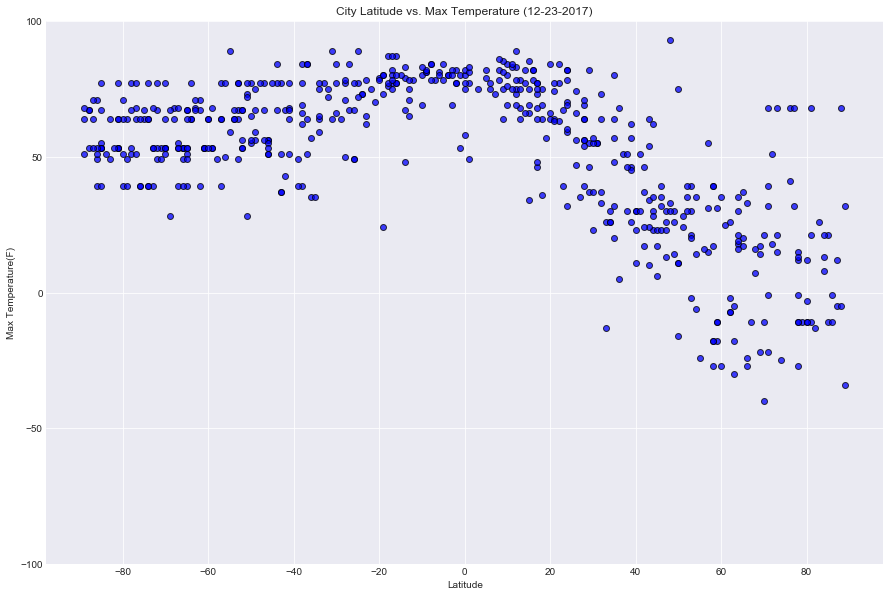

In [67]:
current_date = datetime.now().strftime("%m-%d-%Y")
print('\033[1m' + "Latitude vs Temperature Plot")
plt.figure(figsize=(15,10))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Max Temp'].apply(float).apply(int),
            c="blue",
            marker ='o',
            edgecolors='black',
            alpha=0.75)
plt.title("City Latitude vs. Max Temperature (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.yticks(np.arange(-100, 150, 50))
plt.xticks(np.arange(-80, 100, 20))
plt.grid(True)
sns.set_style('darkgrid')
plt.savefig("LatitudevsTemperature.png")
plt.show()

Latitude vs. Humidity Plot


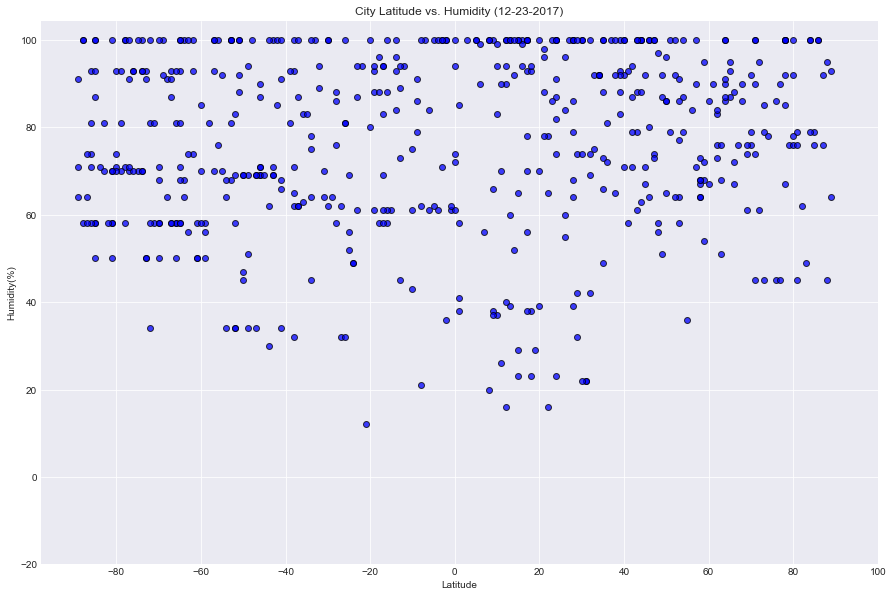

In [64]:
print('\033[1m' + "Latitude vs. Humidity Plot")
plt.figure(figsize=(15,10))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Humidity'].apply(float).apply(int),
            c="blue",
            marker ='o',
            edgecolors='black',
            alpha=0.75)
plt.title("City Latitude vs. Humidity (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.yticks(np.arange(-20, 120, 20))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')
plt.savefig("LatitudevsHumidity.png")
plt.show()


Latitude vs. Cloudiness Plot


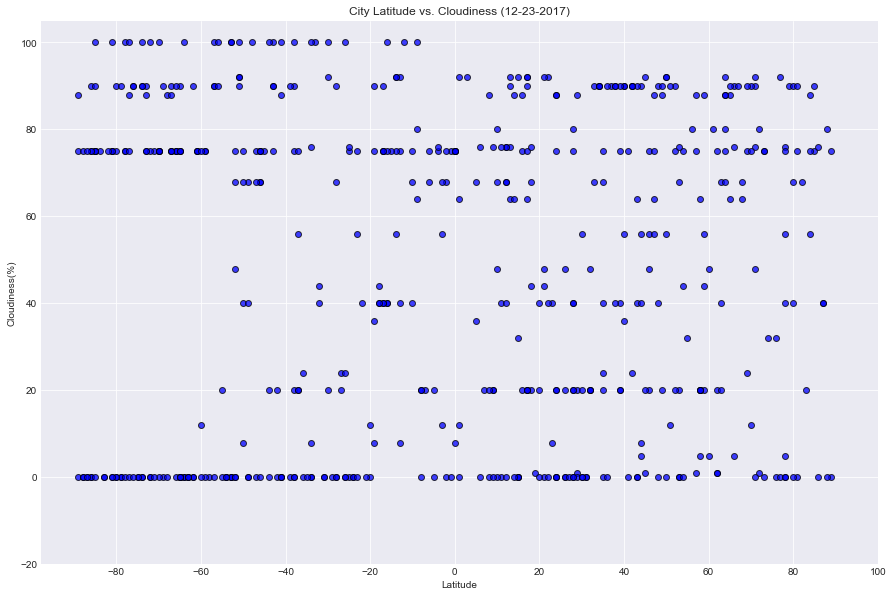

In [65]:
print('\033[1m' + 'Latitude vs. Cloudiness Plot') 
plt.figure(figsize=(15,10))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Cloudiness'].apply(float).apply(int),
            c="blue",
            marker ='o',
            edgecolors='black',
            alpha=0.75)
plt.title("City Latitude vs. Cloudiness (" + str(current_date) + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.yticks(np.arange(-20, 120, 20))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')
plt.savefig("LatitudevsCloudiness.png")
plt.show()

Latitude vs. Wind Speed Plot


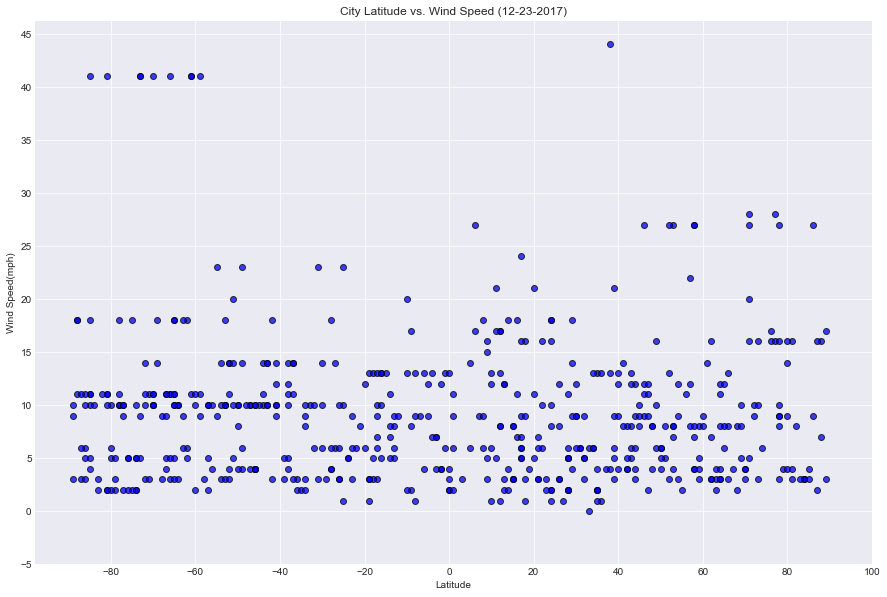

In [66]:
print('\033[1m' + 'Latitude vs. Wind Speed Plot') 
plt.figure(figsize=(15,10))
plt.scatter(x=city_final_df['Lat'].apply(float).apply(int),
            y=city_final_df['Wind Speed'].apply(float).apply(int),
            c="blue",
            marker ='o',
            edgecolors='black',
            alpha=0.75)
plt.title("City Latitude vs. Wind Speed (" + str(current_date) + ")")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.yticks(np.arange(-5, 50, 5))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')
plt.savefig("LatitudevsWindSpeed.png")
plt.show()